<a href="https://colab.research.google.com/github/msurabhi28/DataAnalysis/blob/main/Analysis_of_Climate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To upload files from local file system to colab.

In [1]:
from google.colab import files
uploaded = files.upload()


Saving archive.zip to archive.zip


Link to the data:https://drive.google.com/file/d/1sp5Ql5JDpdiNsWpGqYwrRDt78kBnbQwY/view?usp=sharing

Extracts the contents of a ZIP file named archive.zip into a directory called extracted_files/. It then lists the names of the files and directories that were extracted and prints them.

In [ ]:
import zipfile
import os

zip_file_name = 'archive.zip'

with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall('extracted_files/')

extracted_files = os.listdir('extracted_files/')
print(extracted_files)


['DailyDelhiClimateTest.csv', 'DailyDelhiClimateTrain.csv']


Imports pandas and reads the two CSV files extracted into pandas dataframes.



In [ ]:
import pandas as pd
train_data = pd.read_csv('extracted_files/DailyDelhiClimateTrain.csv')
test_data = pd.read_csv('extracted_files/DailyDelhiClimateTest.csv')



Gives an overview of data and helps to understand basic structure.

In [ ]:
print(train_data.head())

print(train_data.info())

print(train_data.describe())


         date   meantemp   humidity  wind_speed  meanpressure
0  2013-01-01  10.000000  84.500000    0.000000   1015.666667
1  2013-01-02   7.400000  92.000000    2.980000   1017.800000
2  2013-01-03   7.166667  87.000000    4.633333   1018.666667
3  2013-01-04   8.666667  71.333333    1.233333   1017.166667
4  2013-01-05   6.000000  86.833333    3.700000   1016.500000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB
None
          meantemp     humidity   wind_speed  meanpressure
count  1462.000000  1462.000000  1462.000000   1462.000000
mean     25.495521    60.771702     6.802209 

Checks for missing values in the DataFrame 'train_data'.

In [ ]:
print(train_data.isnull().sum())


date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64


Fills missing values in a DataFrame by replacing missing values in numeric columns with the column's mean and in non-numeric columns with the most frequent value (mode). Afterward, it checks to ensure no missing values remain in the dataset.

In [ ]:

numeric_cols = train_data.select_dtypes(include=['float64', 'int64']).columns
train_data[numeric_cols] = train_data[numeric_cols].fillna(train_data[numeric_cols].mean())
non_numeric_cols = train_data.select_dtypes(exclude=['float64', 'int64']).columns
train_data[non_numeric_cols] = train_data[non_numeric_cols].apply(lambda x: x.fillna(x.mode()[0]))
print(train_data.isnull().sum())


date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64


Converts the date column in the 'train_data' DataFrame to a datetime object using pandas to_datetime function.

In [ ]:
train_data['date'] = pd.to_datetime(train_data['date'])


Calculates a 30-day rolling mean of the daily mean temperature and plots both the original temperature data and the rolling mean over time, allowing for a clearer visualization of temperature trends.

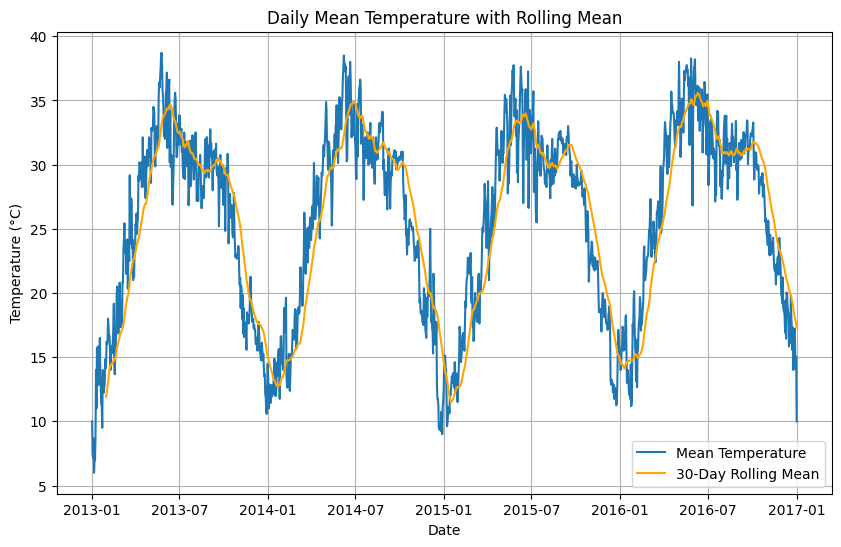

In [ ]:
train_data['temp_roll_mean'] = train_data['meantemp'].rolling(window=30).mean()
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(train_data['date'], train_data['meantemp'], label='Mean Temperature')
plt.plot(train_data['date'], train_data['temp_roll_mean'], label='30-Day Rolling Mean', color='orange')
plt.title('Daily Mean Temperature with Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()


Helps in understanding how the previous day's temperature aligns with the current day's temperature data.

In [ ]:
train_data['temp_lag_1'] = train_data['meantemp'].shift(1)
print(train_data[['meantemp', 'temp_lag_1']].head())

    meantemp  temp_lag_1
0  10.000000         NaN
1   7.400000   10.000000
2   7.166667    7.400000
3   8.666667    7.166667
4   6.000000    8.666667


Calculates Correlation matrix to understand relationship between different numerical variables in the dataset.
The matrix shows:
1.Consistency in previous day's temperature and current day's temperature.
2.As temperature increases,the humidity decreases.
3.The mean pressure & mean temperature is almost independent of each other.
4.Wind Speed is moderately related to mean temperature.


In [ ]:
corr_matrix = train_data.drop(columns=['date']).corr()

print(corr_matrix)


                meantemp  humidity  wind_speed  meanpressure  temp_roll_mean  \
meantemp        1.000000 -0.571951    0.306468     -0.038818        0.918947   
humidity       -0.571951  1.000000   -0.373972      0.001734       -0.393795   
wind_speed      0.306468 -0.373972    1.000000     -0.020670        0.218656   
meanpressure   -0.038818  0.001734   -0.020670      1.000000       -0.041022   
temp_roll_mean  0.918947 -0.393795    0.218656     -0.041022        1.000000   
temp_lag_1      0.974067 -0.526125    0.308009     -0.038114        0.926363   

                temp_lag_1  
meantemp          0.974067  
humidity         -0.526125  
wind_speed        0.308009  
meanpressure     -0.038114  
temp_roll_mean    0.926363  
temp_lag_1        1.000000  


Imports seaborn for advanced visualizations. Generates a heatmap with color code to visualize the relationship between different features of the data.
0->No correlation;
1-> perfect correlation;
Negative correlation indicated with the sign '-'


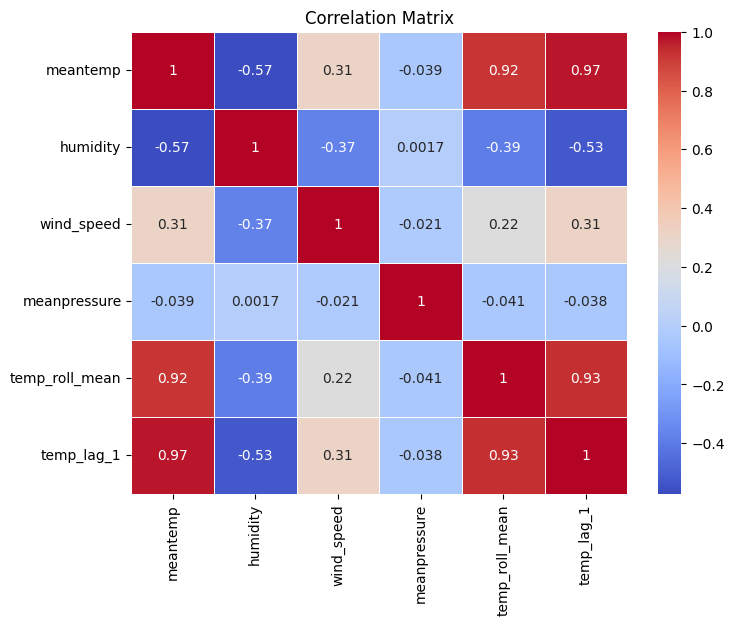

In [ ]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


Displays a time series plot for different weather variables: temperature, humidity, and wind speed.
Helps in analyzing how each variable changes over the same period, facilitating easier comparison and identification of patterns within the data.
The graph shows that temperature & humidity are inversely related.
Wind Speed & temperature does not have a direct relationship.

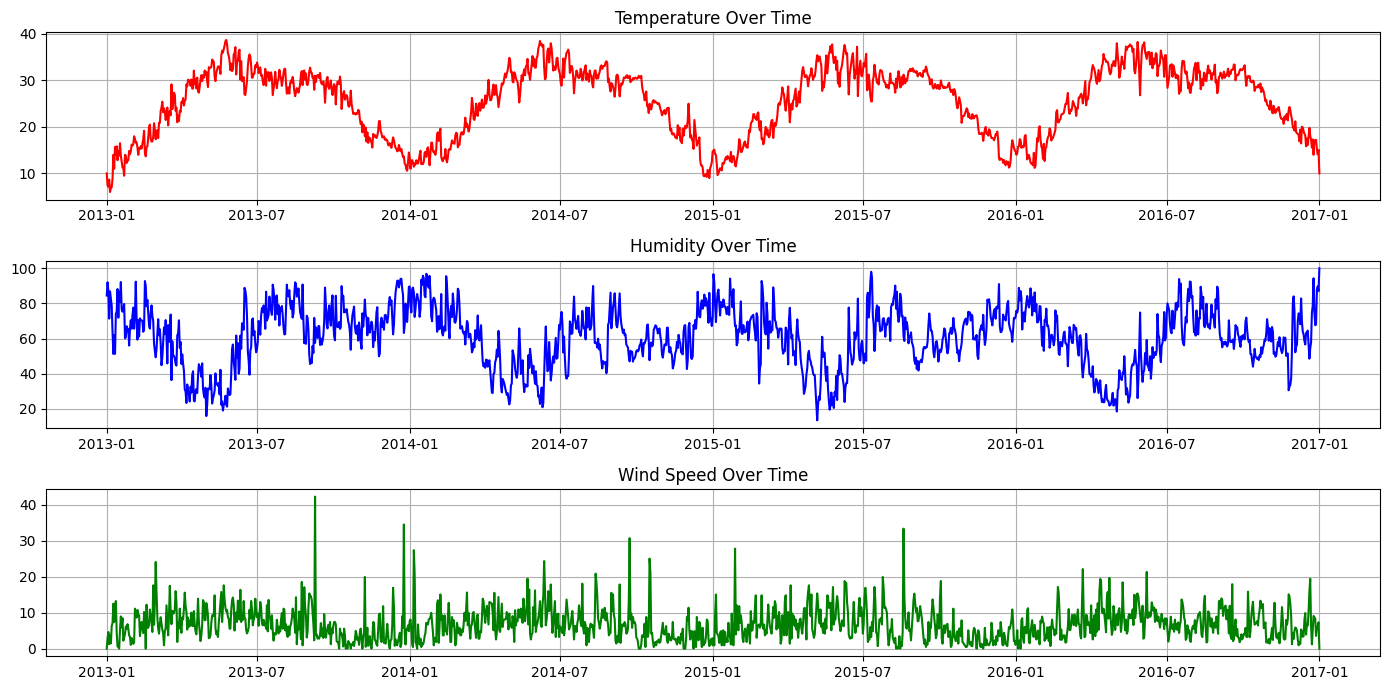

In [ ]:
plt.figure(figsize=(14, 7))

plt.subplot(3, 1, 1)
plt.plot(train_data['date'], train_data['meantemp'], color='red', label='Temperature')
plt.title('Temperature Over Time')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(train_data['date'], train_data['humidity'], color='blue', label='Humidity')
plt.title('Humidity Over Time')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(train_data['date'], train_data['wind_speed'], color='green', label='Wind Speed')
plt.title('Wind Speed Over Time')
plt.grid(True)

plt.tight_layout()
plt.show()


Creates a scatter plot to show the relationship between temperature & humidity.
The clustered points indicate that temperature & humidity are positively correlated during certain months.
The scattered points show that a perfectly linear relationship cannot be established.
Outliers indiacte unusual relationships between temperature & humidity.

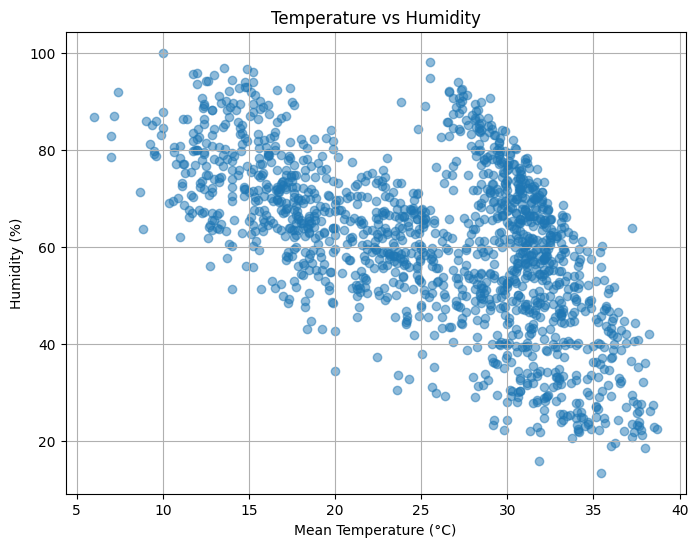

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(train_data['meantemp'], train_data['humidity'], alpha=0.5)
plt.title('Temperature vs Humidity')
plt.xlabel('Mean Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.show()


Creates a boxplot to show the distribution of mean temperatures for each month.
The boxplot provides insights into how temperature varies across different months, highlighting patterns, trends, and outliers within each month. This helps in understanding seasonal variations in temperature and identifying any significant monthly differences.

1.The months with the highest median temperatures are April,May & June.
2.The months with the lowest median temperatures are December and January.
3.Longer boxes suggest a wider range of temperatures, while shorter boxes indicate a more consistent temperature.
4.Points outside the whiskers represent outliers, which are unusually high or low temperatures compared to the rest of the data.

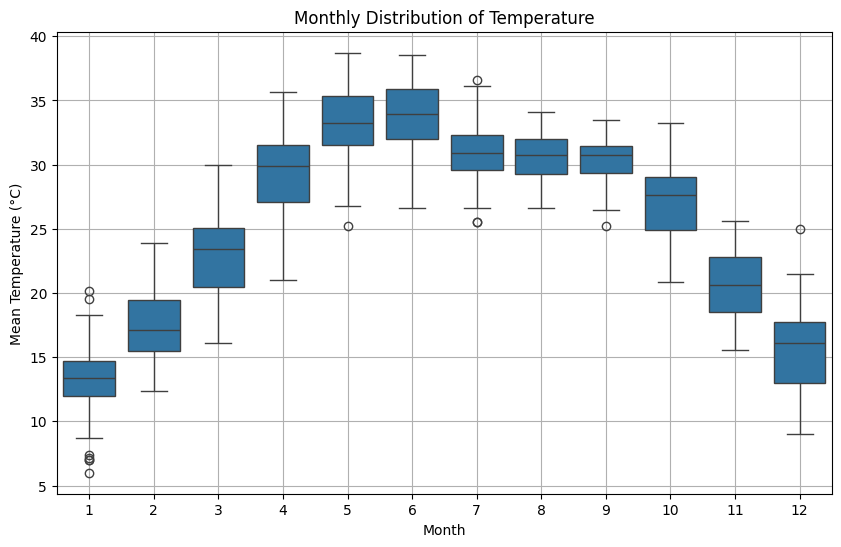

In [ ]:
train_data['month'] = train_data['date'].dt.month
plt.figure(figsize=(10, 6))
sns.boxplot(x='month', y='meantemp', data=train_data)
plt.title('Monthly Distribution of Temperature')
plt.xlabel('Month')
plt.ylabel('Mean Temperature (°C)')
plt.grid(True)
plt.show()


Imports sklearn for machine learning algorithms. Splits the data into training data & testing data.

In [ ]:
from sklearn.model_selection import train_test_split
X = train_data[['temp_lag_1']]
y = train_data['meantemp']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

Ensures that the data is in a format that is compatible with machine learning algorithms.



In [ ]:
import numpy as np
X_train = np.array(X_train)
y_train = np.array(y_train).reshape(-1)

Imports Imputer to fill in any missing values with the mean value as machine learning algorithms cannot handle missing values.

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)

Fits the linear regression model to the training data.
Uses the trained model to predict values on the validation set.
Evaluates the performance of the linear regression model using Mean Squared Error & R2 methods.
The values of MSE & R2(close to 1) indicates that the model is fairly accurate.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()

model.fit(X_train, y_train)
X_val = np.array(X_val)
y_pred = model.predict(X_val)


mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 2.633381646810396
R-squared: 0.951015456277581


Creates a scatter plot to visualize the relationship between actual and predicted values. Helps to assess model's prediction with actual values.
It's fairly accurate to say that the model fits well as the points are clustered along a diagonal line.
Few points located away from diagonal shows outliers.

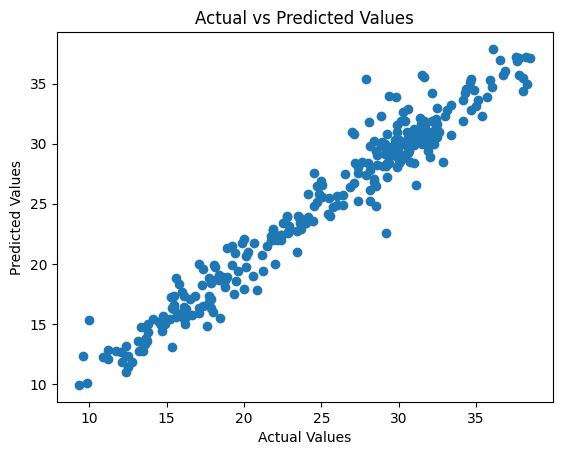

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_val, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()



Calculates temperature anomalies by subtracting the 30-day rolling mean from the actual mean temperature.Helps to highlight deviations from average temperature, making it easier to spot unusual patterns or trends.
It appears that there is a  slight upward trend, suggesting that the average temperature has been increasing over the years.

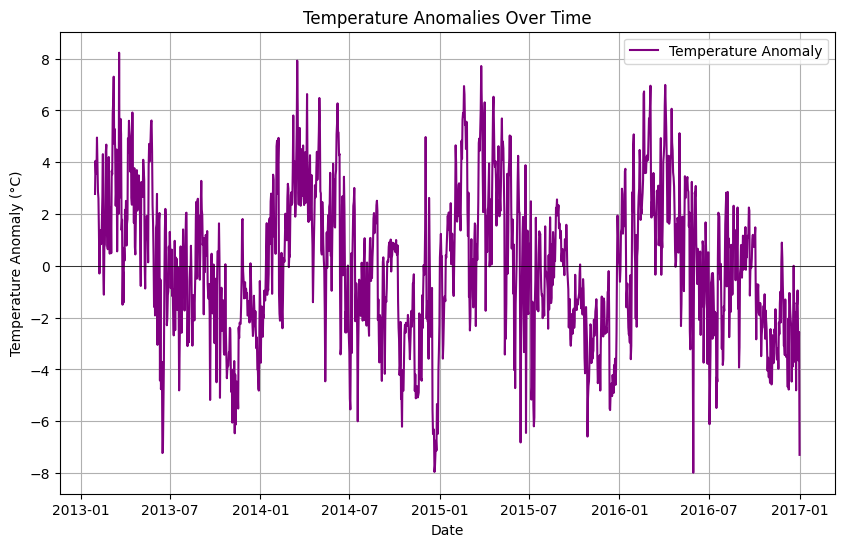

In [ ]:
train_data['temp_anomaly'] = train_data['meantemp'] - train_data['temp_roll_mean']
plt.figure(figsize=(10, 6))
plt.plot(train_data['date'], train_data['temp_anomaly'], color='purple', label='Temperature Anomaly')
plt.title('Temperature Anomalies Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature Anomaly (°C)')
plt.axhline(0, color='black', linewidth=0.5)
plt.legend()
plt.grid(True)
plt.show()


Imports statsmodel for statistical modeling. seasonal_decompose decomposes time series into four components-observed,trend,seasonal & residual. Helps in understanding patterns in the data.
Seasonality component shows seasonal variations in the data.
Trend component indicates upward trend in temperature data over a long period is a strong indicator of climate change.
Residuaity component represents the remaining variation in the data after accounting for trend and seasonality.

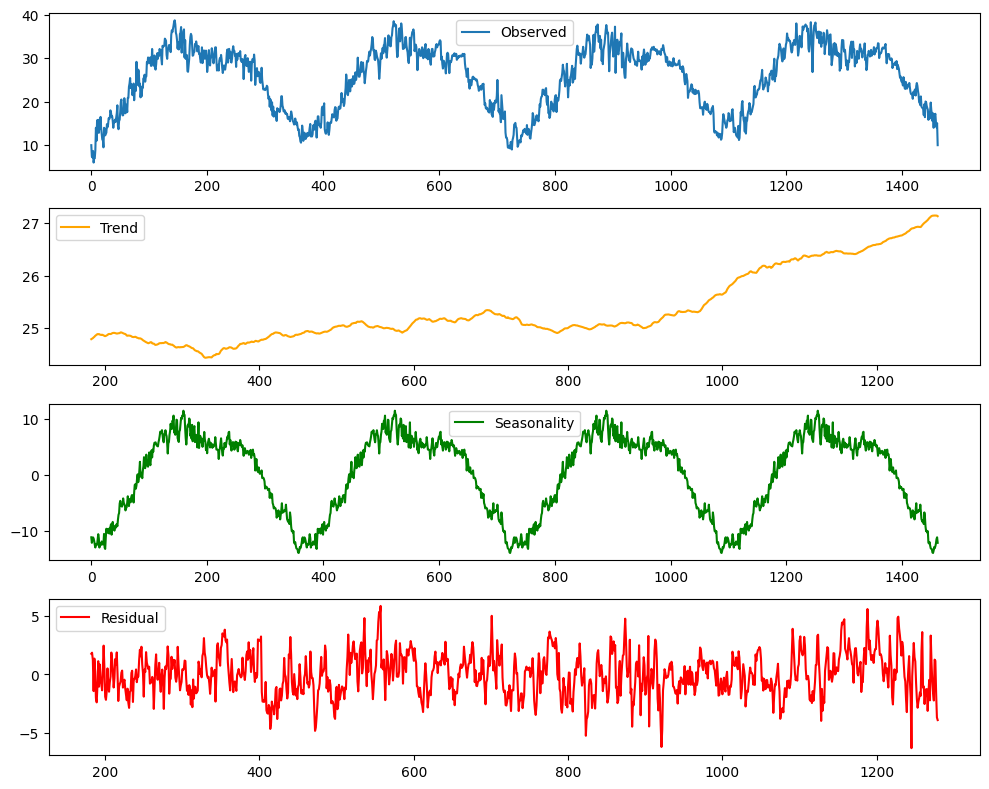

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(train_data['meantemp'], model='additive', period=365)
plt.figure(figsize=(10, 8))

plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='orange')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality', color='green')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual', color='red')
plt.legend(loc='best')

plt.tight_layout()
plt.show()
